<a href="https://colab.research.google.com/github/mogollonalex/ML/blob/main/Tu_primera_red_neuronal_en_Python_y_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

# 1) Modelo con 1 capa intermedia y con 1 neurona

In [ ]:
# Solo una neurona con una capa, usaremos el modelo secuencial
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [ ]:
# Compilación, esto nos permite posteriormente entrenar el modelo
# El optimizador que usaremos se llama Adam, este el permite ajustar los pesos y sesgos de manera eficiente, para que aprenda y no desaprenda
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
# Entrenamiento del modelo
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


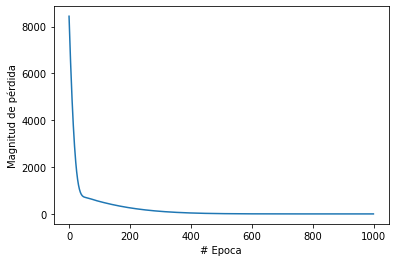

In [ ]:
# Resultado de la función de perdida
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Luego de 400 vueltas aproximadamente el algoritmo deja de aprender, o aprende muy poco, por lo que con epochs=400 será suficiente.
Nota: epochs es un valor que se debe probar hasta encontrar el óptimo


In [ ]:
# Nuestra primera predicción
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[211.73993]] fahrenheit!


In [ ]:
# Peso y el sesgo respectivamente
print("Variables internas del modelo")
#print(capa.get_weights())
print(capa.get_weights())


Variables internas del modelo
[array([[1.7984473]], dtype=float32), array([31.895197], dtype=float32)]


El peso es de 1.7984473 y el sesgo de 31.895197, recordar que nuestra función objetivo de convertir grados celsius a grados fahrenheit es fahrenheit=celsius*1.8+32, por lo que nuestro modelo se entrenó correctamente con un error muy pequeño

# 2) Modelo con dos capas intermedias con tres neuronas

In [ ]:
# Modelo con dos capas intermedias con tres neuronas
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


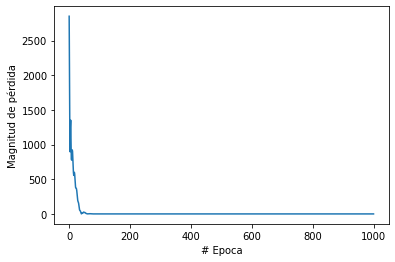

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Luego de 100 vueltas aproximadamente el algoritmo deja de aprender, o aprende muy poco, por lo que con epochs=100 será suficiente.
Nota: epochs es un valor que se debe probar hasta encontrar el óptimo

En este escenario una red más compleja da mejores resultados, más rápido, recordar que esto no siempre es así, esto es experimental.

In [ ]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[211.74747]] fahrenheit!


In [ ]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.11100029,  0.5157373 , -0.4500158 ]], dtype=float32), array([-3.6038728,  3.8812675, -3.9385338], dtype=float32)]
[array([[-1.0536821 ,  0.12610526,  0.4325184 ],
       [ 0.21155705, -0.66393286,  1.1001501 ],
       [-1.3141075 ,  0.64447826,  0.555008  ]], dtype=float32), array([ 3.837536 , -3.8285344,  2.602535 ], dtype=float32)]
[array([[ 1.3803104 ],
       [-0.90391004],
       [ 0.3164189 ]], dtype=float32), array([3.6517909], dtype=float32)]


Source: Inspirado en Ringa Tech. Tu primera red neuronal en Python y Tensorflow